## Programe implements Prim's and Kruskal's Algorithm for connected, undirected graphs 

In [159]:
from graphviz import Graph
import copy

In [160]:
class graph:
    def __init__(self, adjacency_list):
        self.adjacency_list = {}
        self.adjacency_list = adjacency_list
        
    def get_all_vertices(self):
        return self.adjacency_list.keys()
    
    def get_adjacency_list(self):
        return self.adjacency_list
        
    def get_all_edges(self):
        all_edges = []
        for ver, edges in self.adjacency_list.items():
            for e in edges:
                all_edges.append((ver, e[0], e[1]))
        return all_edges
    
    def get_all_edges_sorted(self):
        h = self.get_all_edges()
        return sorted(h, key=lambda edge: edge[2])
    
    def get_min_cost_edge(self):
        min_edge = (0, 0, float('inf'))
        for ver in self.adjacency_list.keys():
            cur_min = min(self.adjacency_list[ver], key = lambda edge: edge[1])
            if min_edge[2] > cur_min[1]:
                min_edge = (ver, cur_min[0], cur_min[1])
        return min_edge
    
    def get_min_cost_edge_from_allowed_ver(self, allowed_vertices):
        min_edge = (0, 0, float('inf'))
        for ver in allowed_vertices:
            lst = self.adjacency_list.get(ver, [])
            if len(lst) > 0:
                cur_min = min(self.adjacency_list[ver], key = lambda edge: edge[1])
                if min_edge[2] > cur_min[1]:
                    min_edge = (ver, cur_min[0], cur_min[1])
        return min_edge
    
    def show_graph(self):
        graph_viz = Graph(strict=True)
        for v in self.get_all_vertices():
            graph_viz.node(v)
        for edge in self.get_all_edges():
            graph_viz.edge(edge[0], edge[1], label = str(edge[2]))
        return graph_viz
    
    def add_edge(self, edge):
        begin = self.adjacency_list.get(edge[0], [])
        begin.append((edge[1], edge[2]))
        self.adjacency_list[edge[0]] = begin 
        end = self.adjacency_list.get(edge[1], [])
        end.append((edge[0], edge[2]))
        self.adjacency_list[edge[1]] = end
        
    def remove_edge(self, edge):
        begin = self.adjacency_list.get(edge[0], [])
        if (edge[1], edge[2]) in begin:
            begin.remove((edge[1], edge[2]))
            self.adjacency_list[edge[0]] = begin

        end = self.adjacency_list.get(edge[1], [])
        if (edge[0], edge[2]) in end:
            end.remove((edge[0], edge[2]))
            self.adjacency_list[edge[0]] = begin

        if not self.adjacency_list.get(edge[0], []):
            self.adjacency_list.pop(edge[0], None)
        if not self.adjacency_list.get(edge[1], []):
            self.adjacency_list.pop(edge[1], None)
    
    def dfs(self):
        visited = []
        self.__dfs_util(visited, list(self.adjacency_list.keys())[0])
        return visited
        
    def __dfs_util(self, visited, vertix):
        if vertix not in visited:
            visited.append(vertix)
            for child in self.adjacency_list[vertix]:
                self.__dfs_util(visited, child[0])
                
    def have_cycle(self):
        visited = []
        vertices = list(self.adjacency_list.keys())
        for vertex in vertices:
            if vertex not in visited:
                if self.__have_cycle_util(visited, vertex, -1):
                    return True
        return False
        
    def __have_cycle_util(self, visited, vertex, parent):
        visited.append(vertex)
        for child in self.adjacency_list[vertex]:
            if child[0] not in visited:
                if self.__have_cycle_util(visited, child[0], vertex):
                    return True
            elif child[0] != parent:
                return True
        return False
    
    def prim(self):
        cur_graph = copy.deepcopy(self)
        allowed_vertices = set()
        min_spanning_tree = graph({})
        
        min_edge = cur_graph.get_min_cost_edge()
        min_spanning_tree.add_edge(min_edge)
        allowed_vertices.add(min_edge[0])
        allowed_vertices.add(min_edge[1])
        cur_graph.remove_edge(min_edge)
        
        while len(min_spanning_tree.get_all_vertices()) < len(self.adjacency_list.keys()):
            min_ed = cur_graph.get_min_cost_edge_from_allowed_ver(allowed_vertices)
            if not (min_ed[0] in allowed_vertices and min_ed[1] in allowed_vertices):
                allowed_vertices.add(min_ed[0])
                allowed_vertices.add(min_ed[1])
                min_spanning_tree.add_edge(min_ed)
            cur_graph.remove_edge(min_ed)
        return min_spanning_tree

    def kruskal(self):
        min_spanning_tree = graph({})
        all_edges = self.get_all_edges_sorted()
        while all_edges:
            min_spanning_tree.add_edge(all_edges[0])
            if min_spanning_tree.have_cycle():
                min_spanning_tree.remove_edge(all_edges[0])
            edge = all_edges[0]
            edge_rev = (edge[1], edge[0], edge[2])
            if edge_rev in all_edges:
                all_edges.remove(edge_rev)
            all_edges.pop(0)
        return min_spanning_tree        

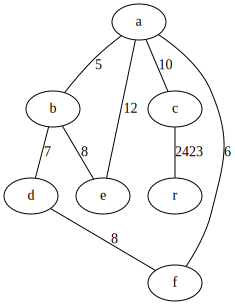

In [161]:
graph1 = graph({
        'a': [('b', 5), ('c', 10), ('e', 12), ('f', 6)],
        'b': [('d', 7), ('a', 5), ('e', 8)],
        'c': [('a', 10)],
        'd': [('b', 7), ('f', 8)],
        'e': [('a', 12), ('b', 8)],
        'f': [('a', 6), ('d', 8)]
        })
graph1.add_edge(('r', 'c', 2423))
graph1.show_graph()

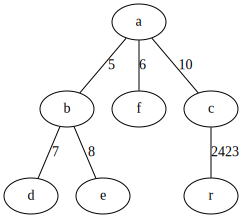

In [162]:
t1 = graph1.kruskal()
t1.show_graph()

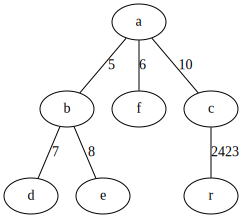

In [163]:
t2 = graph1.prim()
t2.show_graph()

In [164]:
graph_acyclic = graph({
                'a': [('b', 5), ('c', 10)],
                'b': [('d', 7), ('a', 5), ('e', 8)],
                'c': [('a', 10)],
                'd': [('b', 7), ('f', 8)],
                'e': [('b', 8)],
                'f': [('d', 8)]
                })

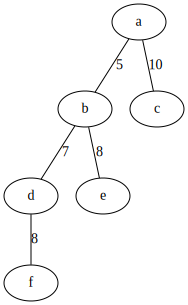

In [165]:
graph_acyclic.show_graph()

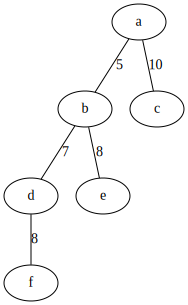

In [166]:
t3 = graph_acyclic.kruskal()
t3.show_graph()

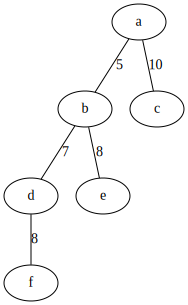

In [167]:
t4 = graph_acyclic.prim()
t4.show_graph()